In [1]:
import glob
import os

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import seaborn
import xarray as xr

%matplotlib inline

In [2]:
data_dir='/home/soontiensn/data/gpsc-work2/OPP/MEOPAR-TREX/OSKERS-correction-factor/output/'
files = glob.glob(os.path.join(data_dir, '*.nc'))
files.sort()

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


{48: ([<matplotlib.lines.Line2D at 0x7fd27d21b518>], []),
 49: ([<matplotlib.lines.Line2D at 0x7fd27d21b588>],
  [Text(-8895.589942774495, 168033.2008962902, '49°N')]),
 50: ([<matplotlib.lines.Line2D at 0x7fd27d1b5a58>],
  [Text(-8895.589942774495, 339149.5797906774, '50°N')])}

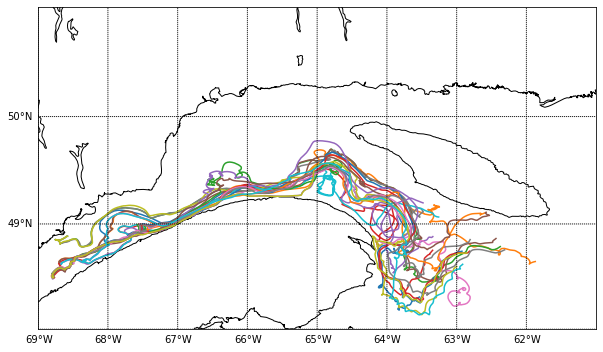

In [3]:
lon_min=-69
lon_max=-61
lat_min=48
lat_max=51
fig, ax = plt.subplots(1,1,figsize=(10,10))
m = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max,
            projection='merc', resolution='h', ax=ax)
for f in files:
    d = xr.open_dataset(f)
    x,y = m(d.lon.values, d.lat.values)
    m.plot(x,y,label=d.obs_buoyid)
m.drawcoastlines()
m.drawmeridians(np.arange(lon_min, lon_max,1),labels=[False, False, False, True])
m.drawparallels(np.arange(lat_min, lat_max,1),labels=[True, False, False, False])

In [4]:
def bearing(east, north):
    radians = np.arctan2(east, north)
    degrees = radians*180./np.pi
    degrees[degrees<0] = degrees[degrees<0] +360
    return degrees

In [5]:
def compile_dataframe(files):
    df_all = pd.DataFrame()
    for f in files:
        d= xr.open_dataset(f)
        df_new = pd.DataFrame({'buoyid': d.obs_buoyid,
                               'alpha_real': d.alpha_real.values,
                               'alpha_imag': d.alpha_imag.values,
                               'ocean_speed': np.sqrt(d.ueast_ocean.values**2 + d.vnorth_ocean.values**2),
                               'ocean_bearing': bearing(d.ueast_ocean.values, d.vnorth_ocean.values),
                               'atmos_speed': np.sqrt(d.ueast_atmos.values**2 + d.vnorth_atmos.values**2),
                               'atmos_bearing': bearing(d.ueast_atmos.values, d.vnorth_atmos.values),
                               'drifter_speed': np.sqrt(d.ueast_drifter.values**2 + d.vnorth_drifter.values**2),
                               'drifter_bearing': bearing(d.ueast_drifter.values, d.vnorth_drifter.values),
                               'ueast_drifter': d.ueast_drifter.values,
                               'vnorth_drifter': d.vnorth_drifter.values,
                               'ueast_ocean': d.ueast_ocean.values,
                               'vnorth_ocean': d.vnorth_ocean.values,
                               'ueast_atmos': d.ueast_atmos.values,
                               'vnorth_atmos': d.vnorth_ocean.values,
                               'lon': d.lon.values,
                               'lat': d.lat.values,
                               'time': d.time.values})
        df_all = pd.concat([df_all, df_new])
    return df_all

In [6]:
df = compile_dataframe(files)

In [7]:
df

buoyid  alpha_real  alpha_imag  ocean_speed  ocean_bearing  \
0    1001300434064148020   -0.026146    0.040460     0.450021     259.521211   
1    1001300434064148020   -0.003057    0.033419     0.465999     259.285251   
2    1001300434064148020   -0.012697    0.023339     0.503998     255.959138   
3    1001300434064148020   -0.018852    0.017088     0.542998     253.522277   
4    1001300434064148020   -0.044892    0.025635     0.558029     254.611999   
..                   ...         ...         ...          ...            ...   
431   956300434064324300    0.010755    0.003581     0.144556      53.826336   
432   956300434064324300    0.003449    0.003595     0.270099      62.352968   
433   956300434064324300   -0.004250    0.010004     0.360631      64.681888   
434   956300434064324300   -0.004288    0.015826     0.415585      68.095687   
435   956300434064324300   -0.001204    0.015016     0.414456      70.640903   

     atmos_speed  atmos_bearing  drifter_speed  drifter_bearing  \
0       7.100301     238.500286       0.266074       210.271288   
1       8.877289     212.476480       0.294967       220.874666   
2       9.671886     215.751838       0.280400       236.563001   
3       8.861653     215.805886       0.318695       250.359087   
4       6.624669     215.462094       0.227208       268.896365   
..           ...            ...            ...              ...   
431     9.561005      37.162905       0.241420        38.875075   
432     9.875835      36.140668       0.288807        53.008101   
433     9.775686      37.624977       0.287355        50.954279   
434     9.998186      33.607295       0.309428        48.032921   
435    10.039091      30.575016       0.326413        51.397279   

     ueast_drifter  vnorth_drifter  ueast_ocean  vnorth_ocean  ueast_atmos  \
0        -0.134127       -0.229795    -0.442515     -0.081846    -6.054020   
1        -0.193028       -0.223037    -0.457874     -0.086638    -4.766690   
2        -0.233992       -0.154506    -0.488940     -0.122277    -5.651048   
3        -0.300152       -0.107121    -0.520697     -0.154017    -5.184430   
4        -0.227166       -0.004376    -0.538024     -0.148075    -3.843396   
..             ...             ...          ...           ...          ...   
431       0.151521        0.187950     0.116690      0.085322     5.775643   
432       0.230676        0.173776     0.239260      0.125332     5.824468   
433       0.223172        0.181016     0.325992      0.154222     5.967963   
434       0.230069        0.206916     0.385583      0.155037     5.533972   
435       0.255089        0.203654     0.391022      0.137387     5.106545   

     vnorth_atmos        lon        lat                time  
0       -0.081846 -68.309022  48.665559 2020-09-10 18:00:00  
1       -0.086638 -68.316231  48.657910 2020-09-10 19:00:00  
2       -0.122277 -68.326483  48.651682 2020-09-10 20:00:00  
3       -0.154017 -68.338529  48.647018 2020-09-10 21:00:00  
4       -0.148075 -68.352382  48.644752 2020-09-10 22:00:00  
..            ...        ...        ...                 ...  
431      0.085322 -62.954440  48.595007 2020-09-28 18:00:00  
432      0.125332 -62.947044  48.601091 2020-09-28 19:00:00  
433      0.154222 -62.935784  48.606716 2020-09-28 20:00:00  
434      0.155037 -62.924888  48.612576 2020-09-28 21:00:00  
435      0.137387 -62.913654  48.619274 2020-09-28 22:00:00  

[8465 rows x 18 columns]

# Difference between ocean model speed and drifter speed

In [8]:
def plot_error_map(df, m, ax):

    x,y = m(df.lon.values, df.lat.values)
    speed_error = df.ocean_speed.values - df.drifter_speed.values
    mesh = m.hexbin(x,y,C=speed_error, vmin=-1,vmax=1,ax=ax, cmap='RdBu_r')
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('ocean model speed - drifter speed [m/s]')

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


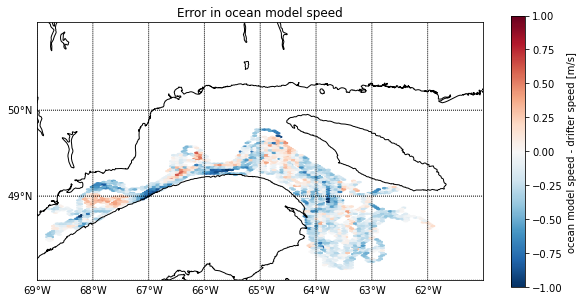

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
lon_min=-69
lon_max=-61
lat_min=48
lat_max=51
m = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max,
            projection='merc', resolution='h', ax=ax)
plot_error_map(df, m, ax)
m.drawcoastlines()
m.drawmeridians(np.arange(lon_min, lon_max,1),labels=[False, False, False, True])
m.drawparallels(np.arange(lat_min, lat_max,1),labels=[True, False, False, False])
ax.set_title('Error in ocean model speed')
fig.savefig('map_ocean_speed_error.png',bbox_inches='tight')

# Adjusted model speed - drifter speed

Idea: Define an adjusted model velocity for each drifter:

$ u_{adjusted} = u_{ocean} + mean(\alpha)*u_{atmos}$

Then calculate errors between $u_{adjusted}$ and $u_{drifter}$.

In [10]:
grouped = df.groupby('buoyid')

In [11]:
dfadjusted = pd.DataFrame()
for buoyid, g in grouped:
    mean = g.mean()
    n = len(g['ueast_ocean'].values)
    alpha = complex(mean['alpha_real'], mean['alpha_imag'])
    ocean = np.array([complex(g['ueast_ocean'].values[i], g['vnorth_ocean'].values[i]) for i in range(n)])
    atmos = np.array([complex(g['ueast_atmos'].values[i], g['vnorth_atmos'].values[i]) for i in range(n)])
    adjusted = ocean + alpha*atmos
    adjusted_east = adjusted.real
    adjusted_north = adjusted.imag
    adjusted_speed = np.sqrt(adjusted_east**2 + adjusted_north**2)
    adjusted_bearing = bearing(adjusted_east, adjusted_north)
    dfnew = pd.DataFrame({'buoyid': buoyid,
                        'adjusted_speed': adjusted_speed,
                        'adjusted_north': adjusted_north,
                        'adjusted_east': adjusted_east,
                        'adjusted_bearing': adjusted_bearing,
                        'drifter_speed': g.drifter_speed.values,
                        'drifter_north': g.vnorth_drifter.values,
                        'drifter_east': g.ueast_drifter.values,
                        'drifter_bearing': g.drifter_bearing.values,
                        'ocean_speed': g.ocean_speed.values,
                        'ocean_bearing': g.ocean_bearing.values,
                        'lon': g.lon.values,
                        'lat': g.lat.values,
                        'time': g.time.values})
    dfadjusted = pd.concat([dfadjusted, dfnew])


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
dfadjusted

buoyid  adjusted_speed  adjusted_north  adjusted_east  \
0    1001300434064148020        0.563149       -0.198686      -0.526935   
1    1001300434064148020        0.553637       -0.178949      -0.523919   
2    1001300434064148020        0.612499       -0.231992      -0.566864   
3    1001300434064148020        0.644127       -0.255267      -0.591387   
4    1001300434064148020        0.630751       -0.223617      -0.589781   
..                   ...             ...             ...            ...   
431   956300434064324300        0.329593        0.185576       0.272384   
432   956300434064324300        0.456355        0.227503       0.395604   
433   956300434064324300        0.550774        0.259611       0.485750   
434   956300434064324300        0.590507        0.253090       0.533520   
435   956300434064324300        0.574670        0.227712       0.527629   

     adjusted_bearing  drifter_speed  drifter_north  drifter_east  \
0          249.340527       0.266074      -0.229795     -0.134127   
1          251.141958       0.294967      -0.223037     -0.193028   
2          247.742940       0.280400      -0.154506     -0.233992   
3          246.652994       0.318695      -0.107121     -0.300152   
4          249.235695       0.227208      -0.004376     -0.227166   
..                ...            ...            ...           ...   
431         55.733344       0.241420       0.187950      0.151521   
432         60.097805       0.288807       0.173776      0.230676   
433         61.877543       0.287355       0.181016      0.223172   
434         64.621374       0.309428       0.206916      0.230069   
435         66.656124       0.326413       0.203654      0.255089   

     drifter_bearing  ocean_speed  ocean_bearing        lon        lat  \
0         210.271288     0.450021     259.521211 -68.309022  48.665559   
1         220.874666     0.465999     259.285251 -68.316231  48.657910   
2         236.563001     0.503998     255.959138 -68.326483  48.651682   
3         250.359087     0.542998     253.522277 -68.338529  48.647018   
4         268.896365     0.558029     254.611999 -68.352382  48.644752   
..               ...          ...            ...        ...        ...   
431        38.875075     0.144556      53.826336 -62.954440  48.595007   
432        53.008101     0.270099      62.352968 -62.947044  48.601091   
433        50.954279     0.360631      64.681888 -62.935784  48.606716   
434        48.032921     0.415585      68.095687 -62.924888  48.612576   
435        51.397279     0.414456      70.640903 -62.913654  48.619274   

                   time  
0   2020-09-10 18:00:00  
1   2020-09-10 19:00:00  
2   2020-09-10 20:00:00  
3   2020-09-10 21:00:00  
4   2020-09-10 22:00:00  
..                  ...  
431 2020-09-28 18:00:00  
432 2020-09-28 19:00:00  
433 2020-09-28 20:00:00  
434 2020-09-28 21:00:00  
435 2020-09-28 22:00:00  

[8465 rows x 14 columns]

In [13]:
def plot_adjusted_error_map(df, m, ax):

    x,y = m(df.lon.values, df.lat.values)
    speed_error = df.adjusted_speed.values - df.drifter_speed.values
    mesh = m.hexbin(x,y,C=speed_error, vmin=-1,vmax=1,ax=ax,cmap='RdBu_r')
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('adjusted speed - drifter speed [m/s]')

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


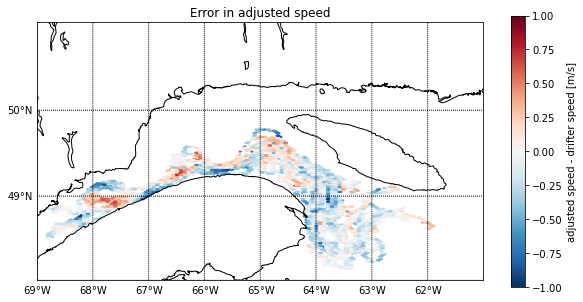

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
lon_min=-69
lon_max=-61
lat_min=48
lat_max=51
m = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max,
            projection='merc', resolution='h', ax=ax)
plot_adjusted_error_map(dfadjusted, m, ax)
m.drawcoastlines()
m.drawmeridians(np.arange(lon_min, lon_max,1),labels=[False, False, False, True])
m.drawparallels(np.arange(lat_min, lat_max,1),labels=[True, False, False, False])
ax.set_title('Error in adjusted speed')
fig.savefig('map_adjusted_speed_error.png',bbox_inches='tight')

In [15]:
adjusted_error = dfadjusted.adjusted_speed-dfadjusted.drifter_speed
adjusted_rmse = np.sqrt(np.mean(adjusted_error**2))
print(adjusted_rmse)

0.3012158874074954


In [16]:
ocean_error = dfadjusted.ocean_speed-dfadjusted.drifter_speed
ocean_rmse = np.sqrt(np.mean(ocean_error**2))
print(ocean_rmse)

0.310440103028124


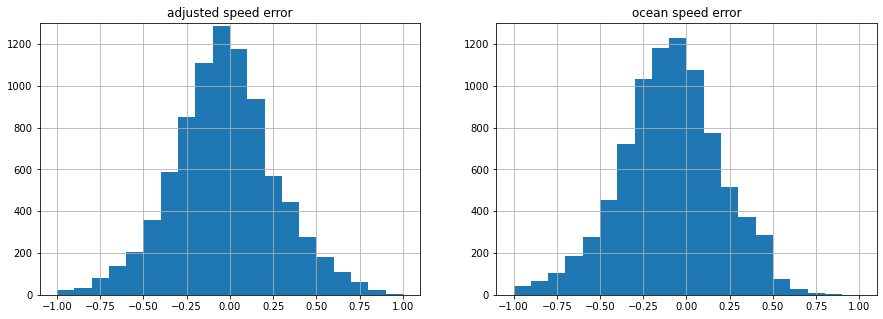

In [17]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
ylim=[0,1300]
bins = np.arange(-1,1.1,.1)
ax=axs[0]
ax.hist(adjusted_error, bins=bins)
ax.set_title('adjusted speed error')
ax.grid()
ax.set_ylim(ylim)
ax=axs[1]
ax.hist(ocean_error, bins=bins)
ax.set_title('ocean speed error')
ax.grid()
ax.set_ylim(ylim)
fig.savefig('hist_speed_error.png',bbox_inches='tight')

In [18]:
diff = dfadjusted.adjusted_bearing-dfadjusted.drifter_bearing
diff[diff>180] = diff[diff>180]-360
diff[diff<-180] = diff[diff<-180]+360
print(np.sqrt(np.mean((diff)**2)))
adjusted_bearing_error = diff

70.40120819553708


In [19]:
diff = dfadjusted.ocean_bearing-dfadjusted.drifter_bearing
diff[diff>180] = diff[diff>180]-360
diff[diff<-180] = diff[diff<-180]+360
print(np.sqrt(np.mean((diff)**2)))
ocean_bearing_error = diff

79.65095185853323


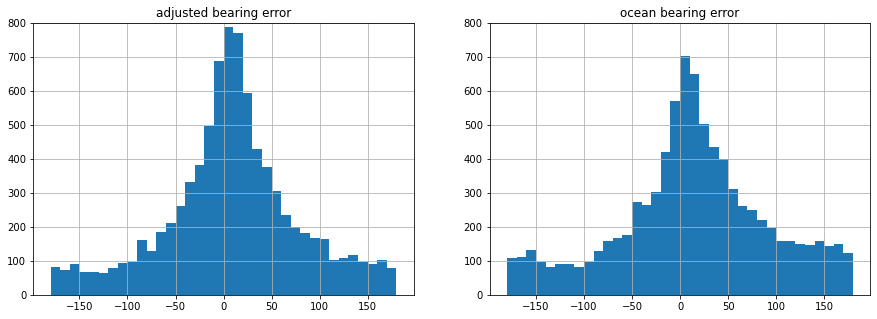

In [20]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
bins = np.arange(-180,190,10)
ylim=[0,800]
ax=axs[0]
ax.hist(adjusted_bearing_error, bins=bins)
ax.set_title('adjusted bearing error')
ax.grid()
ax.set_ylim(ylim)
ax=axs[1]
ax.hist(ocean_bearing_error, bins=bins)
ax.set_title('ocean bearing error')
ax.grid()
ax.set_ylim(ylim)
fig.savefig('hist_bearing_error.png',bbox_inches='tight')

In [21]:
def plot_ocean_bearing_error_map(df, m, ax):
    diff = df.ocean_bearing-df.drifter_bearing
    diff[diff>180] = diff[diff>180]-360
    diff[diff<-180] = diff[diff<-180]+360
    ocean_bearing_error = diff
    x,y = m(df.lon.values, df.lat.values)
    mesh = m.hexbin(x,y,C=ocean_bearing_error, vmin=-180,vmax=180,ax=ax,cmap='twilight_shifted')
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('ocean bearing - drifter bearing [deg]')

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


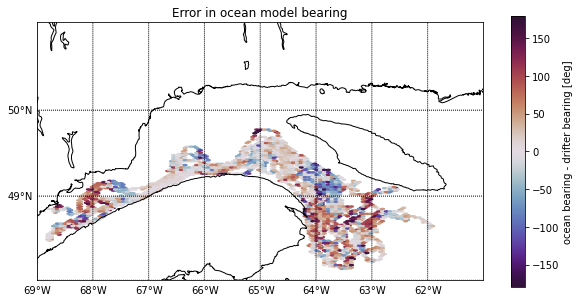

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
lon_min=-69
lon_max=-61
lat_min=48
lat_max=51
m = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max,
            projection='merc', resolution='h', ax=ax)
plot_ocean_bearing_error_map(dfadjusted, m, ax)
m.drawcoastlines()
m.drawmeridians(np.arange(lon_min, lon_max,1),labels=[False, False, False, True])
m.drawparallels(np.arange(lat_min, lat_max,1),labels=[True, False, False, False])
ax.set_title('Error in ocean model bearing')
fig.savefig('map_ocean_bearing_error.png',bbox_inches='tight')

In [23]:
def plot_adjusted_bearing_error_map(df, m, ax):
    diff = df.adjusted_bearing-df.drifter_bearing
    diff[diff>180] = diff[diff>180]-360
    diff[diff<-180] = diff[diff<-180]+360
    ocean_bearing_error = diff
    x,y = m(df.lon.values, df.lat.values)
    mesh = m.hexbin(x,y,C=ocean_bearing_error, vmin=-180,vmax=180,ax=ax,cmap='twilight_shifted')
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('adjusted bearing - drifter bearing [deg]')

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


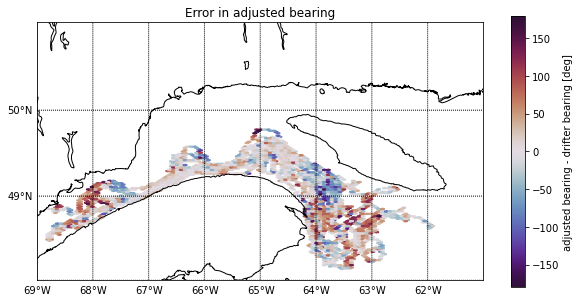

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
lon_min=-69
lon_max=-61
lat_min=48
lat_max=51
m = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max,
            projection='merc', resolution='h', ax=ax)
plot_adjusted_bearing_error_map(dfadjusted, m, ax)
m.drawcoastlines()
m.drawmeridians(np.arange(lon_min, lon_max,1),labels=[False, False, False, True])
m.drawparallels(np.arange(lat_min, lat_max,1),labels=[True, False, False, False])
ax.set_title('Error in adjusted bearing')
fig.savefig('map_adjusted_bearing_error.png',bbox_inches='tight')

In [25]:
dfadjusted['adjusted_error'] = adjusted_error
dfadjusted['ocean_error'] = ocean_error
dfadjusted['adjusted_bearing_error'] = adjusted_bearing_error
dfadjusted['ocean_bearing_error'] = ocean_bearing_error

In [26]:
var = dfadjusted.var()
print(var[['adjusted_speed', 'ocean_speed', 'drifter_speed', 'adjusted_error', 'ocean_error']])

adjusted_speed    0.077129
ocean_speed       0.056168
drifter_speed     0.079360
adjusted_error    0.089814
ocean_error       0.087412
dtype: float64


In [27]:
print(dfadjusted.std()[['adjusted_speed', 'ocean_speed', 'drifter_speed', 'adjusted_error', 'ocean_error']])

adjusted_speed    0.277721
ocean_speed       0.236997
drifter_speed     0.281709
adjusted_error    0.299690
ocean_error       0.295655
dtype: float64


In [28]:
print(var['adjusted_error']/var['drifter_speed'])
print(var['ocean_error']/var['drifter_speed'])

1.1317263364748793
1.101457527049099


In [29]:
print(var['adjusted_bearing_error']/var['drifter_bearing'])
print(var['ocean_bearing_error']/var['drifter_bearing'])

0.6569901102172808
0.8303851052440908
